Once dubbed "The next Covid," Monkeypox is a relatively unknown disease. Because it has not been previously observed outside of Africa, there are not many public studies about the transmission of Monkeypox. We decided to analyze the trends of the Monkeypox outbreak and predict causation or correlation factors.

First, we downloaded the necessary libraries for analysis:


Matplotlib - Lower level graph plotting library for Python that we can use to visualize data.

Numpy - Library for large arrays and high-level mathematical functions. Dependency of Matplotlib required for plotting numberical data.


Pandas - Data manipulation library that allows us to edit data structures and tables.


Plotly - Open-source plotting library that allows us to represent data using a variety of different chart types. Plotly is more sophisticated and aesthetic than Matplotlib.


Plotly Express - The plotly.express module is plotly’s high-level API for rapid figure generation.


Scipy - Library with tools for computing including modules for optimization and curve fitting.

In [55]:
# Visualization Imports
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import pandas as pd
from scipy.optimize import curve_fit

We will import global data about Monkeypox infections and define a dataframe that contains only the total number of cases globally. The chart shown below is a preview of the rest of the data table for our new data frame.

In [56]:
df = pd.read_csv("owid-monkeypox-data.csv")
df.head()

#data frame with just the global data
world = df[df['location']== "World"]
world.head()

,location,iso_code,date,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
12757,World,OWID_WRL,2022-05-01,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0
12758,World,OWID_WRL,2022-05-02,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0
12759,World,OWID_WRL,2022-05-03,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0
12760,World,OWID_WRL,2022-05-04,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0
12761,World,OWID_WRL,2022-05-05,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0


Now we have the global monkeypox case data. Let's look at total cases over time. 

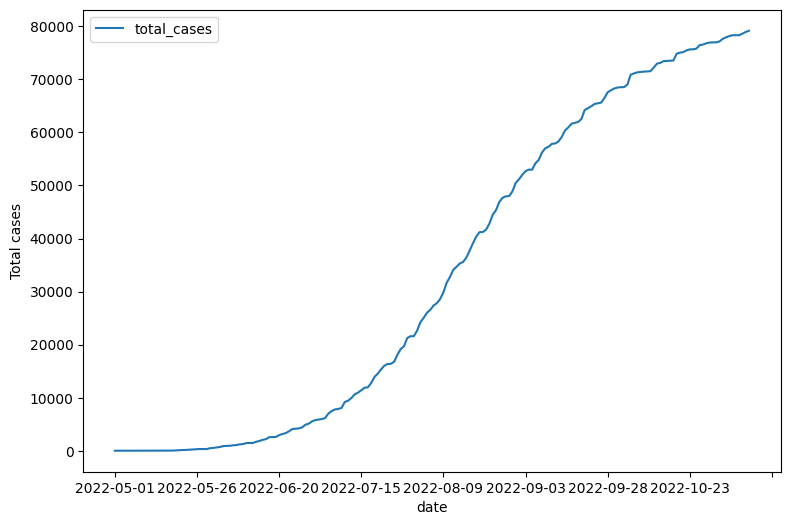

In [57]:
pl = world.plot(x= "date", y= "total_cases", ylabel='Total cases', figsize=(9, 6))

We can see there is almost logistic shape of the total monkeypox cases in the world, and the rate at which the number of total cases is changing is currently decreasing.

Let's look at the total cases per million over time in a few European countries: the United Kingdom, Spain, and France.

C:\Users\catel\AppData\Local\Temp\ipykernel_5556\2410491802.py:6: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



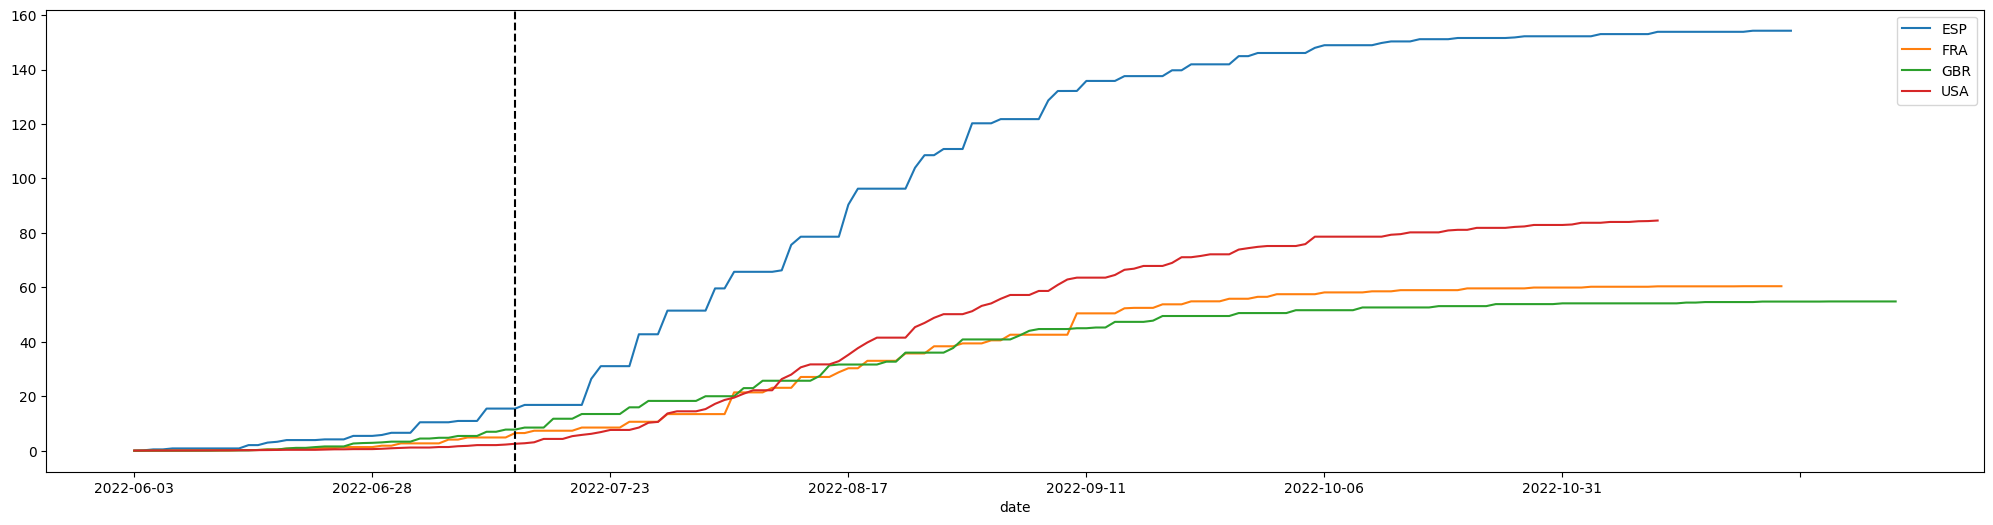

In [58]:
df1 = df.query("(iso_code=='GBR' or iso_code=='ESP' or iso_code=='FRA')")
#ADD USA

fig, ax = plt.subplots()

for key, grp in df1.groupby(['iso_code']):
    ax = grp.plot(ax=ax, kind='line', x='date', y='total_cases_per_million', label = key, figsize = (25, 6))

plt.legend(loc='best')
plt.axvline(x = 40, color = "black", ls='--')
plt.show()

We can see that Spain has the most cases per million for the basically all of the graph, and France and the United Kingdom have fairly similar curves.

We can also look at the total cases for each of these countries. Note that since these contries have fairly similar populations, the total cases doesn't look too different than the total cases per million. 

C:\Users\catel\AppData\Local\Temp\ipykernel_5556\573085493.py:3: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



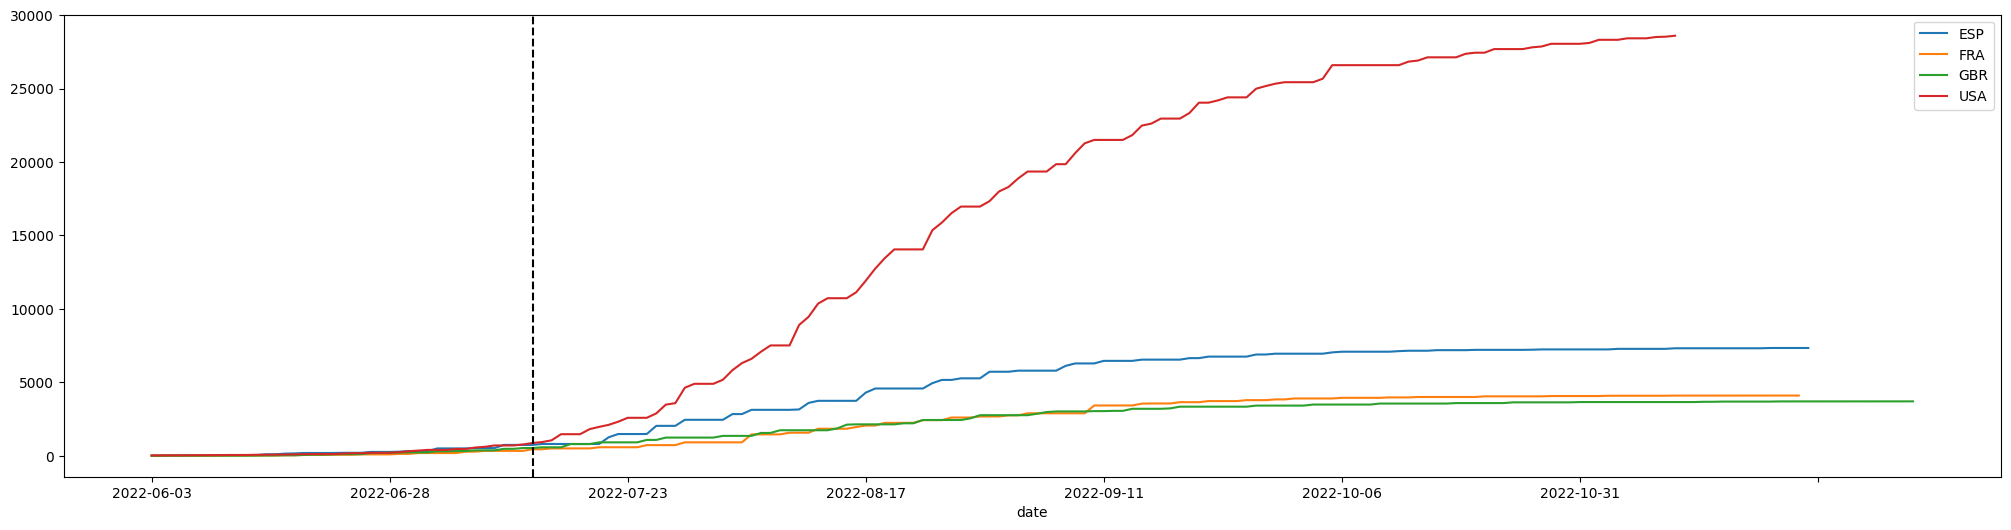

In [59]:
fig, ax = plt.subplots()

for key, grp in df1.groupby(['iso_code']):
    ax = grp.plot(ax=ax, kind='line', x='date', y='total_cases', label = key, figsize = (25, 6))

plt.legend(loc='best')
plt.axvline(x = 40, color = "black", ls='--')
plt.show()

The dotted line in the graph above represents the approximate date of European pride celebrations during the month of July 2022. 
We can see how this occured right before the cases in Spain began to sky rocket. Monkeypox cases began spreading rapidly in the population of gay men. According to the CDC, the vast majority of monkeypox cases are in men. Members of this population are therefore at an increased risk for contracting monkeypox. The pride celebrations were super spreader events for monkeypox. 

It is very important that we are careful in our language in discussing this issue, especially after all of the homophobia and strigmitization that resulted from HIV also spreading through the population of gay men. 

Now we will examine the number of new cases per million perople for the European countries.

C:\Users\catel\AppData\Local\Temp\ipykernel_5556\3363244628.py:4: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



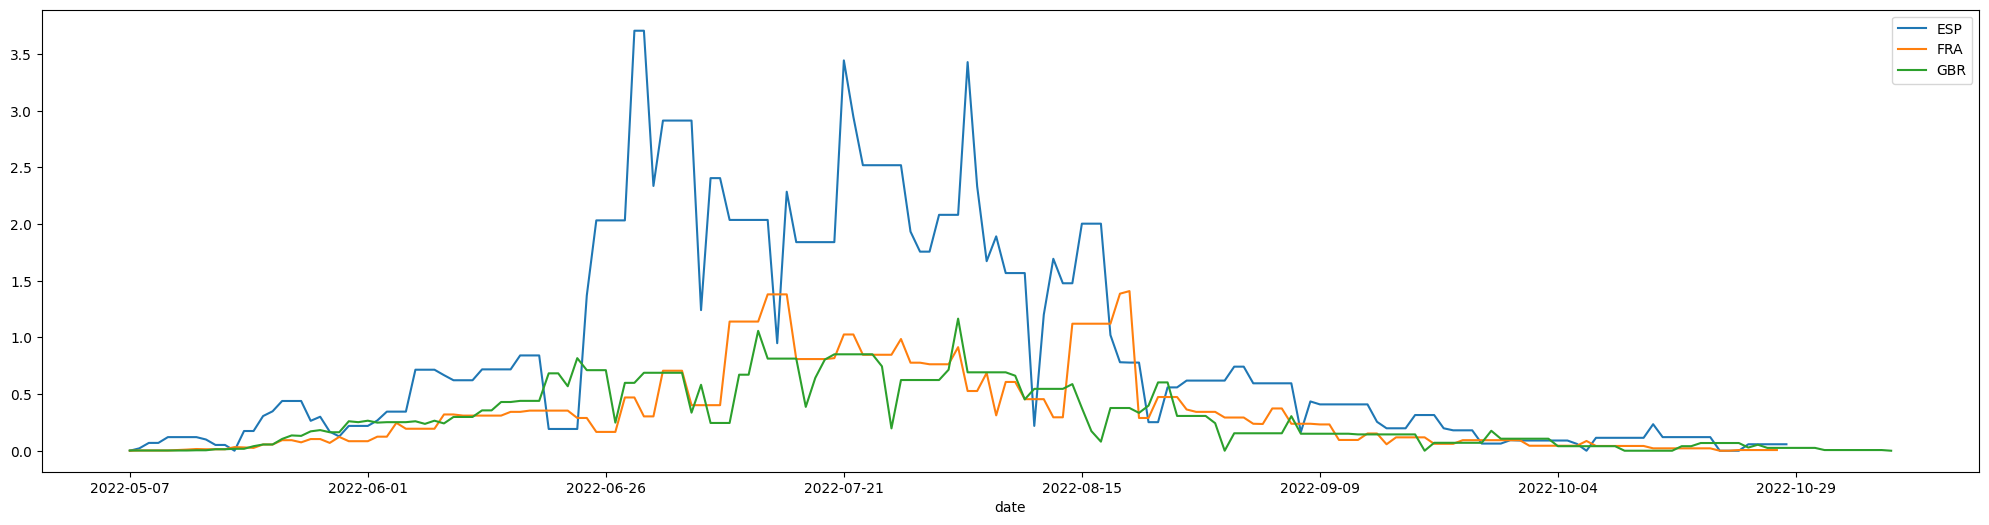

In [60]:
df2 = df.query("(iso_code=='GBR' or iso_code=='ESP' or iso_code=='FRA')")
fig, ax = plt.subplots()

for key, grp in df2.groupby(['iso_code']):
    ax = grp.plot(ax=ax, kind='line', x='date', y='new_cases_smoothed_per_million', label = key, figsize = (25, 6))

plt.legend(loc='best')
plt.show()

We can see that Spain has the most new cases per person overall. We can also conclude that the monkeypox epidemic is improving as in all 4 countries, the number of new cases reported is trending towards 0. Two possible explanations for this are that the increase in awareness about monkeypox has led to safer sex practices and that the monkeypox vaccine has become more readily available and is successfully hindering the spread of monkeypox. This trend is probably explained by a combination of those two factors, in addition to other factors. 

Now we will read in the data for Monkeypox cases provided by the European Union, as it is ideal to examine multiple sources, and filter so we only observe countries with significant outbreaks (more than 20 reported new cases).

In [61]:
data = pd.read_csv('EUData.csv')
df = pd.DataFrame(data)

#Filter data to only include countries with more than 20 confirmed cases
Severedf = df[(df.ConfCases >= 20)]

#Display first twenty reports of >= 20 new cases
Severedf.head(20)

,DateRep,CountryExp,CountryCode,Source,ConfCases
491,2022-05-18,Spain,ES,TESSy,20
549,2022-05-20,Spain,ES,TESSy,21
752,2022-05-27,Spain,ES,TESSy,22
839,2022-05-30,Spain,ES,TESSy,26
897,2022-06-01,Spain,ES,TESSy,22
926,2022-06-02,Spain,ES,TESSy,27
955,2022-06-03,Spain,ES,TESSy,28
1042,2022-06-06,Spain,ES,TESSy,28
1054,2022-06-07,Germany,DE,TESSy,33
1071,2022-06-07,Spain,ES,TESSy,45


Now we plot the maximum number of new cases for each country to observe the severity of the outbreak in each country:

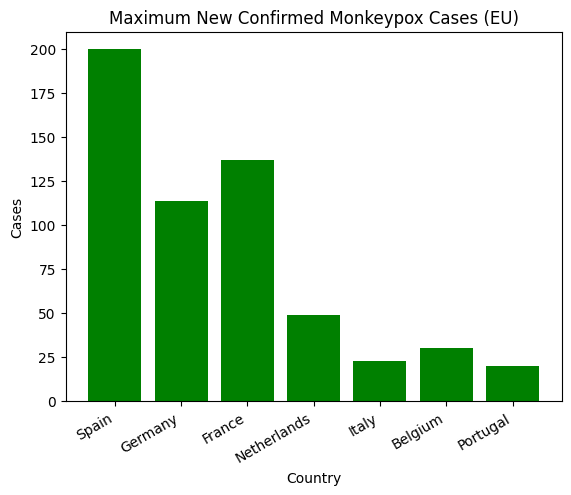

In [62]:
#Plot maximum new confirmed cases
#Location
X = list(Severedf.iloc[:, 1])
#Number of cases
Y = list(Severedf.iloc[:, 4])

  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Maximum New Confirmed Monkeypox Cases (EU)")
plt.xlabel("Country")
plt.ylabel("Cases")
plt.xticks(rotation=30, ha='right')

  
# Show the plot
plt.show()

Now we can create an interactive plot that helps us understand when the outbreak was most severe in each country. Below are the total number of confirmed cases in each Country. You can use your mouse to observe the distrubution of outbreaks over each month.

In [63]:
fig = px.bar(Severedf, y='ConfCases', x='CountryExp', text='DateRep')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

Below is a another representation of new Monkeypox cases in various European countries that reported more than 20 confirmed cases. Each country follows a similar pattern and the Monkeypox outbreak spiked in Mid-July in Europe.

In [64]:
#Graph of cases in European countries with more than 20 new confirmed cases
fig = px.line(Severedf, x="DateRep", y="ConfCases", color='CountryExp')
fig.show()

Spain had the most confirmed cases in the EU, so we will isolate and examine that data

In [65]:
#Isolate data from Spain
Spaindf = df[(df.CountryCode == "ES")]
Spaindf.head(20)

,DateRep,CountryExp,CountryCode,Source,ConfCases
27,2022-04-22,Spain,ES,TESSy,0
56,2022-04-29,Spain,ES,TESSy,0
85,2022-05-01,Spain,ES,TESSy,0
114,2022-05-04,Spain,ES,TESSy,0
143,2022-05-05,Spain,ES,TESSy,0
172,2022-05-07,Spain,ES,TESSy,0
201,2022-05-08,Spain,ES,TESSy,0
230,2022-05-09,Spain,ES,TESSy,0
259,2022-05-10,Spain,ES,TESSy,0
288,2022-05-11,Spain,ES,TESSy,0


We can plot the number of new cases in Spain over time as well as some other data points:

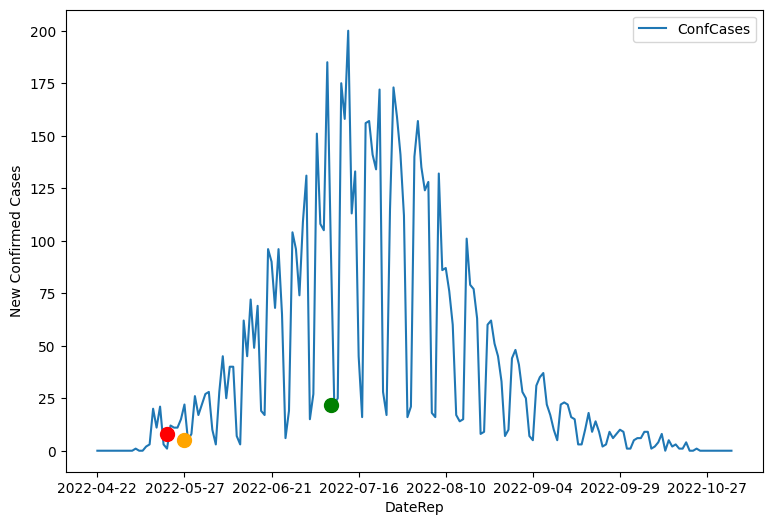

In [66]:
#Plot new cases in Spain over time
Spaindf.plot(x = 'DateRep', y = 'ConfCases', ylabel = 'New Confirmed Cases', figsize=(9, 6))

#Gay pride event in Canary islands (2022-06-15)
plt.plot(25, 5, marker="o", markersize=10, markeredgecolor="orange",
markerfacecolor="orange")

#First cases of Monkeypox in Madrid (2022-06-20)
plt.plot(20, 8, marker="o", markersize=10, markeredgecolor="red",
markerfacecolor="red")

#Plot date of Pride celebration (2022-07-09) with 22 new cases
plt.plot(67, 22, marker="o", markersize=10, markeredgecolor="green",
markerfacecolor="green")

Notable events in the Spain outbreak as plotted on the graph:



Red: The Community of Madrid regional government reported the first eight suspected cases of monkeypox, and seven of them were confirmed by the Ministry of Health on May 20th.



Orange: The government reported that 48% of cases were also HIV-positive and that the largest contagion event occured at the gay pride event in the Canary Islands which ended on May 15th. As you can see, cases continued to increase rapidly after that date.



Green: The Pride Parade in Madrid took place on 2022-07-09 and there was a spike in cases four days later on July 18th with 200 new cases, the most reported in a day for Spain.



These data points suggest a correlation between celebrations in the LGBTQ+ Community and Monkeypox transmission.



Below is another representation of new casese in Spain over time. Roll your pointer over the line to see data for specific points.

In [67]:
#Another representation of new confirmed cases in Spain
fig = px.line(Spaindf, x='DateRep', y='ConfCases')
fig.show()

The graph above demonstrates that after it spikedo on July 13th, 2022, Spain has the Monkeypox outbreak under control and is no longer seeing new cases.

Below is a graph of the number of Monkeypox cases in the United States per state. Note that the total number of cases in the United States as of November 22, 2022 was 29,630 while the total number in Europe was 20,887. This is interesting given that the total population of The EU is 500 million people while the population of the United States is far less with 329 million people. This relationship between population and number of cases suggests that the outbreak was more severe in the United States.

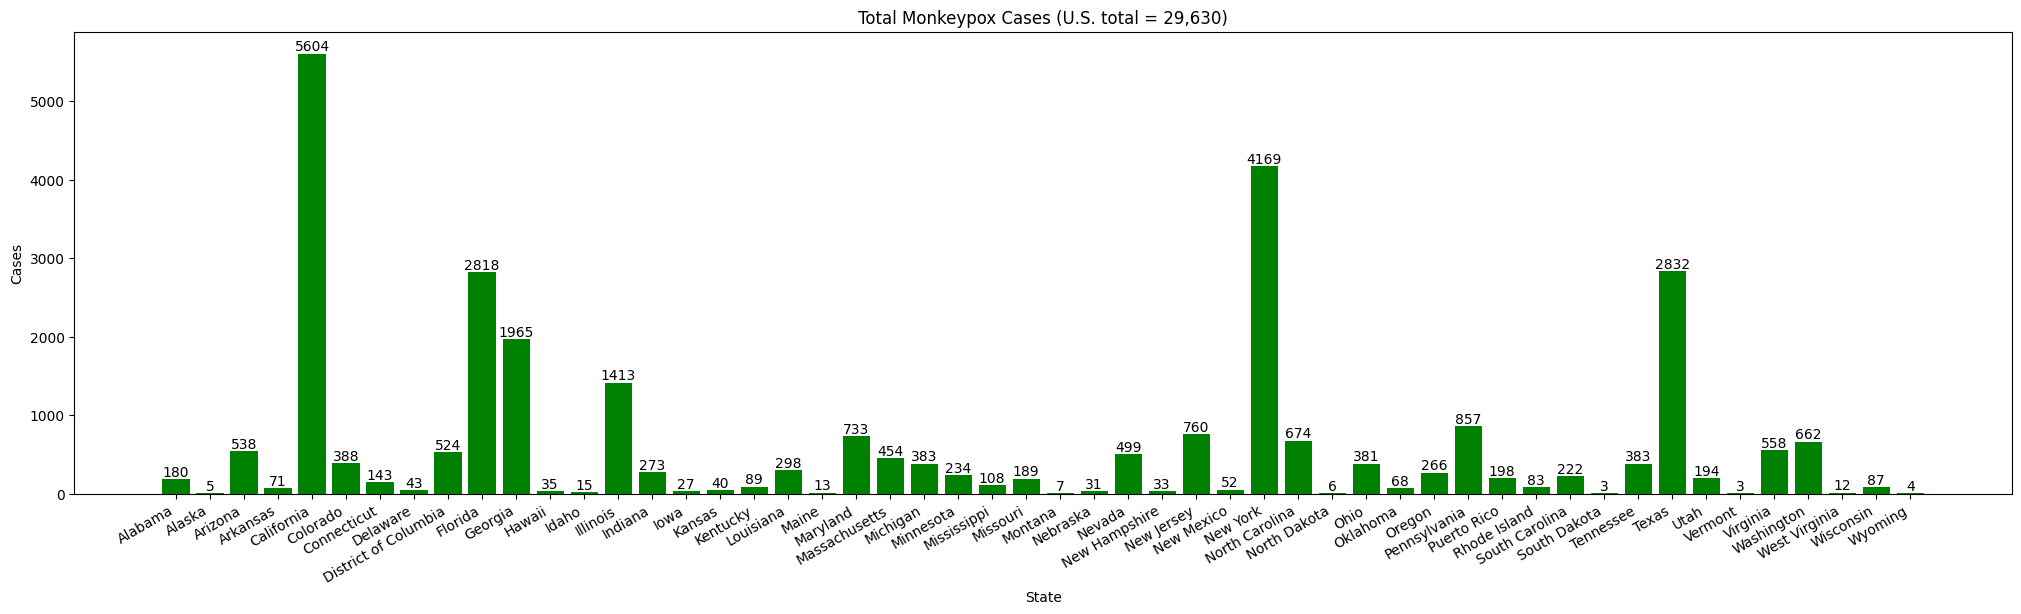

In [68]:
data = pd.read_csv('data-table.csv')
df = pd.DataFrame(data)

df = df[(df.Location != 'Total')]
df = df[(df.Location != 'Non-US Resident')]

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])
  
# Plot the data using bar() method
plt.figure(figsize=(25, 6))
plt.bar(X, Y, color='g')
plt.title("Total Monkeypox Cases (U.S. total = 29,630)")
plt.xlabel("State")
plt.ylabel("Cases")
plt.xticks(rotation=30, ha='right')

for i in range(len(Y)):
    plt.annotate(str(Y[i]), xy=(X[i],Y[i]), ha='center', va='bottom')

plt.show()

This graph suggests a correlation between Monkeypox outbreaks and population, as the data for the population of each state can be seen below. Data is according to the U.S. Census Bureau.

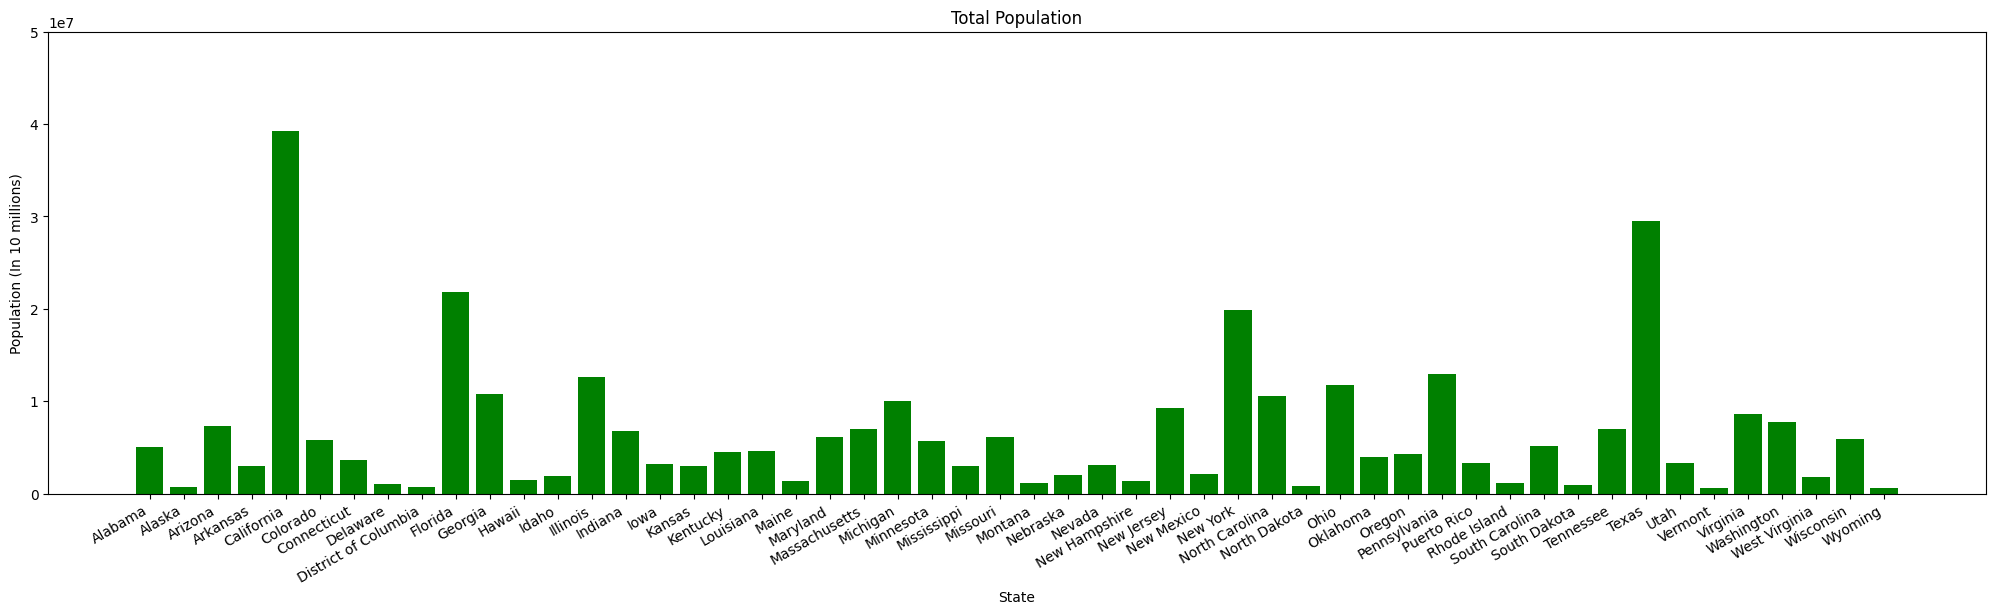

In [69]:
data = pd.read_csv('POP_DATA.csv')
df = pd.DataFrame(data)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])
  
# Plot the data using bar() method
plt.figure(figsize=(25, 6))
plt.bar(X, Y, color='g')
plt.title("Total Population")
plt.xlabel("State")
plt.ylabel("Population (In 10 millions)")
plt.xticks(rotation=30, ha='right')
plt.ylim([0, 50000000])

plt.show()

As we can see by comparing the two graphs, there is a strong correlation between total state population and number of Monkeypox cases. One interesting thing to note is that the number of monkeypox cases in New York does not appear proportional to its populations as it has significantly fewer cases than less populous states like Texas. This is likely becuase New York was adamant early on with their Monkeypox vaccination campaign and education efforts about safe habits to prevent virus transmission.

Now let's look at vaccine data and see how this may relate to the changes in the number of new cases observed. For this analysis, we will only look at data in the USA. Let's start by filtering the dataset to make a new data set with just the United States data. Below is a preview of our data table.

In [70]:
df = pd.read_csv("owid-monkeypox-data.csv")
usa = df[df['location']== "United States"]
usa.head()

,location,iso_code,date,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
12360,United States,USA,2022-06-03,19.0,0.0,19.0,0.0,2.71,0.0,0.056,0.056,0.008,0.0,0.0,0.0
12361,United States,USA,2022-06-04,21.0,0.0,2.0,0.0,3.00,0.0,0.006,0.062,0.009,0.0,0.0,0.0
12362,United States,USA,2022-06-05,25.0,0.0,4.0,0.0,3.57,0.0,0.012,0.074,0.011,0.0,0.0,0.0
12363,United States,USA,2022-06-06,25.0,0.0,0.0,0.0,3.57,0.0,0.000,0.074,0.011,0.0,0.0,0.0
12364,United States,USA,2022-06-07,25.0,0.0,0.0,0.0,3.57,0.0,0.000,0.074,0.011,0.0,0.0,0.0


Let's import a new data set pertaining to Monkeypox vaccines administered in the United States.

In [71]:
vax = pd.read_csv("VaxData3.csv")
vax["Date2"] = pd.to_datetime(vax["Date2"]).dt.strftime("%Y%m%d")
#vax['Vaccines'] = vax["Vaccines"].replace(',', '')
vax['Vaccines'] = vax['Vaccines'].astype(int)
vax.head()

,Date,Date2,Dose,Vaccines
0,5/28/22,20220528,First,49
1,6/4/22,20220604,First,74
2,6/11/22,20220611,First,145
3,6/18/22,20220618,First,167
4,6/25/22,20220625,First,1396


Let's make a bar graph of the number of first doses of vaccines administered in each date interval. 

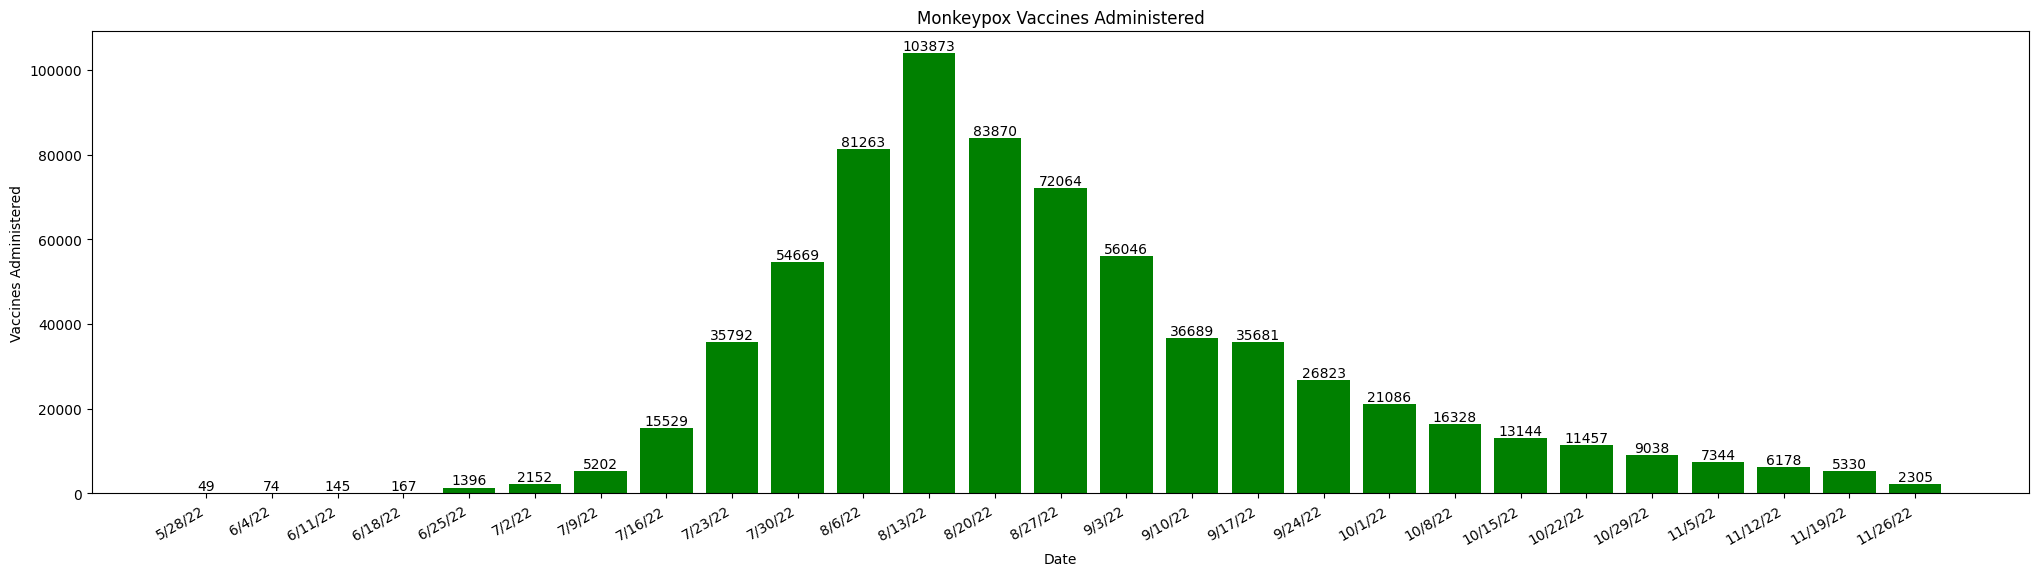

In [72]:
X = list(vax.iloc[:, 0])
Y = list(vax.iloc[:, 3])

# Plot the data using bar() method
plt.figure(figsize=(25, 6))
plt.bar(X, Y, color='g')
plt.title("Monkeypox Vaccines Administered")
plt.xlabel("Date")
plt.ylabel("Vaccines Administered")
plt.xticks(rotation=30, ha='right')

for i in range(len(Y)):
    plt.annotate(str(Y[i]), xy=(X[i],Y[i]), ha='center', va='bottom')

plt.show()

Let's compare this to a graph of the new cases in the United States. 

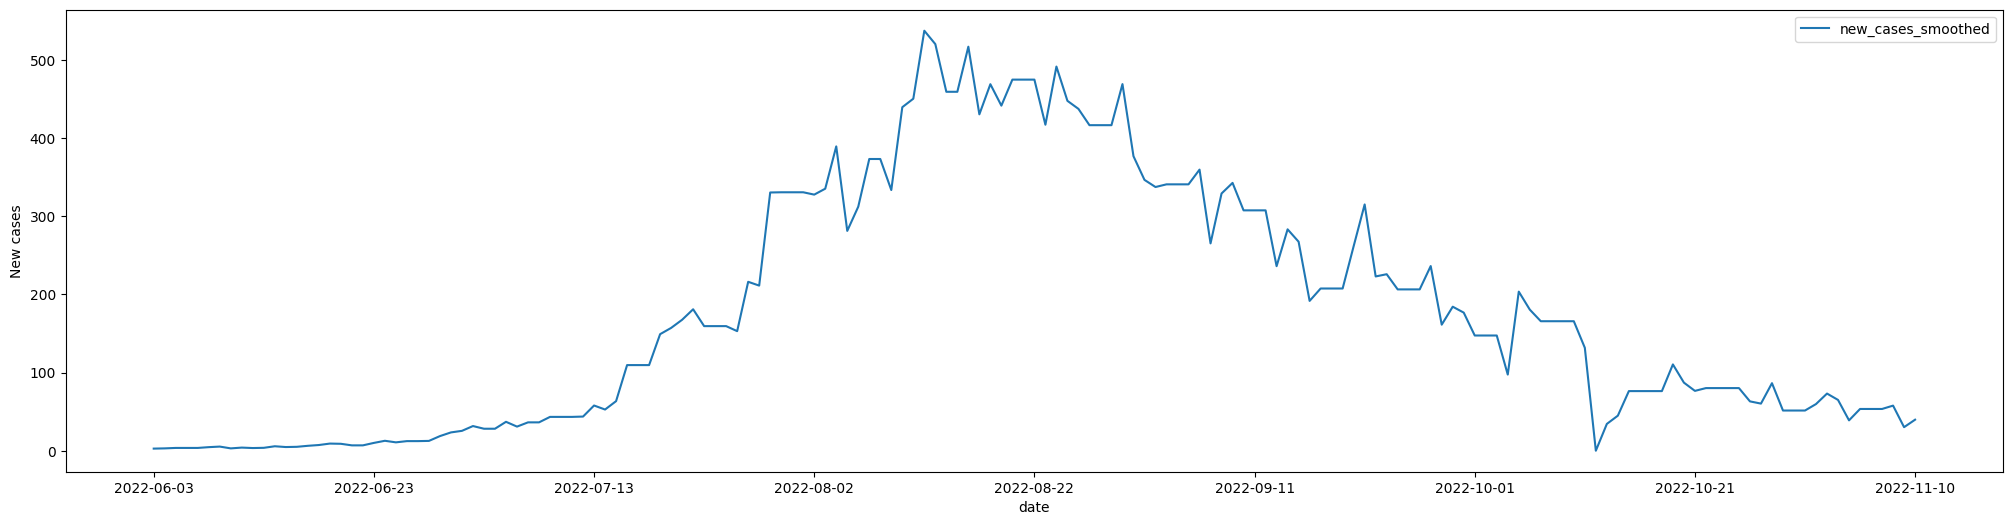

In [73]:

pl = usa.plot(x= "date", y= "new_cases_smoothed", ylabel='New cases', figsize=(25, 6))

We can see that the peak of the new cases in the United States occurs in August, 2022. This also coincides with the peak number of vaccines administered. In August 2022, monkeypox was spreading rapidly, and vaccines were at the highest rate of being administered. Now, towards the end of August, the number of new cases starts to decrease, suggesting the vaccine may have played a role in decreasing the spread of monkeypox. The number of monkeypox vaccines administered also begins to decrease, perhaps because there are fewer people who still need the vaccine. This data indicates that vaccines efforts are effective and all that all populations, and especially people who frequent pride events, should make an effort to get vaccinated and prevent future outbreaks.

Sources:

Our World in Data (Global Monkeypox) - https://ourworldindata.org/monkeypox

EU Centre for Disease Prevention and Control (EU Monkeypox Cases) - https://www.ecdc.europa.eu/en/publications-data/data-monkeypox-cases-eueea

CDC (US Vaccination Data) - https://covid.cdc.gov/covid-data-tracker/#datatracker-home

CDC (US Monkeypox Cases) - https://www.cdc.gov/poxvirus/monkeypox/response/2022/mpx-trends.html

United States Census Bureau (State Populations) - https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html

IGLTA (Pride Celebrations) - https://www.iglta.org/events/pride-calendar/